<a href="https://colab.research.google.com/github/RMoulla/MLB/blob/main/Classification_SMS_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification de SMS

Dans ce TP, nous allons nous familiariser avec l'entraînement de modèles de machine learning sur des donnéestextuelles. Nous allons considérer le dataset SMS Spam Collection,un ensemble de données public accessible qui comprend des messages textuels en anglais, étiquetés manuellement comme étant du "spam" ou du "ham" (non-spam). Ce dataset contient un total de 5 574 messages.

Ce TP permet d'aborder les points suivants :

* Prétraiter des données textuelles pour la classification de texte, y compris le nettoyage et la vectorisation du texte.

* Appliquer plusieurs algorithmes de machine learning, y compris la régression logistique, le SVM (Support Vector Machine), et le Naïve Bayes, pour la classification de texte.

* Évaluer la performance des modèles de classification en utilisant des métriques telles que l'accuracy, la précision, le rappel, et le F1-Score.

* Interpréter les résultats des modèles et comprendre l'importance des caractéristiques (mots) dans la décision des modèles.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Prétraitement des données

Après avoir partionné les donnnées en train et test, la phase de prétraitement consiste essentiellement en :

**Tokenisation** : Diviser le texte en unités élémentaires, appelées tokens, qui sont généralement les mots.

**Vectorisation** : Convertir le texte en vecteurs numériques, un processus essentiel puisque les modèles de machine learning travaillent avec des données numériques.

In [ ]:
import numpy as np
# Division du dataset
X = data['v2']  # Messages SMS
y = data['v1']  # Étiquettes spam ou ham
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorisation
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)
with np.printoptions(threshold=np.inf):
   print(X_train_vectors.toarray()[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

## Modélisation

### Régression logistique

In [ ]:

# Re-importing necessary libraries and re-defining data loading and vectorization steps due to code execution reset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Entraînement du modèle de régression logistique
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vectors, y_train)

# Prédiction sur l'ensemble de test
lr_predictions = lr_model.predict(X_test_vectors)

# Calcul des métriques d'évaluation
accuracy_lr = accuracy_score(y_test, lr_predictions)
precision_lr = precision_score(y_test, lr_predictions, pos_label='spam')
recall_lr = recall_score(y_test, lr_predictions, pos_label='spam')
f1_lr = f1_score(y_test, lr_predictions, pos_label='spam')

# Affichage des résultats pour la régression logistique
print(f"Logistic regression Accuracy: {accuracy_lr:.2f}")
print(f"Logistic regression Precision: {precision_lr:.2f}")
print(f"Logistic regression Recall: {recall_lr:.2f}")
print(f"Logistic regression F1-Score: {f1_lr:.2f}")

Logistic regression Accuracy: 0.98
Logistic regression Precision: 1.00
Logistic regression Recall: 0.84
Logistic regression F1-Score: 0.91


### SVM

In [ ]:
from sklearn.svm import SVC

# Entraînement du modèle SVM
svm_model = SVC(probability=True)
svm_model.fit(X_train_vectors, y_train)

# Prédiction sur l'ensemble de test avec le modèle SVM
svm_predictions = svm_model.predict(X_test_vectors)

# Calcul des métriques d'évaluation pour le modèle SVM
accuracy_svm = accuracy_score(y_test, svm_predictions)
precision_svm = precision_score(y_test, svm_predictions, pos_label='spam')
recall_svm = recall_score(y_test, svm_predictions, pos_label='spam')
f1_svm = f1_score(y_test, svm_predictions, pos_label='spam')


# Affichage des résultats pour le modèle SVM
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"SVM Precision: {precision_svm:.2f}")
print(f"SVM Recall: {recall_svm:.2f}")
print(f"SVM F1-Score: {f1_svm:.2f}")

SVM Accuracy: 0.98
SVM Precision: 1.00
SVM Recall: 0.85
SVM F1-Score: 0.92
SVM ROC AUC: 0.92


### Naïve Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Entraînement du modèle Naïve Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vectors, y_train)

# Prédiction sur l'ensemble de test avec le modèle Naïve Bayes
nb_predictions = nb_model.predict(X_test_vectors)

# Calcul des métriques d'évaluation pour le modèle Naïve Bayes
accuracy_nb = accuracy_score(y_test, nb_predictions)
precision_nb = precision_score(y_test, nb_predictions, pos_label='spam')
recall_nb = recall_score(y_test, nb_predictions, pos_label='spam')
f1_nb = f1_score(y_test, nb_predictions, pos_label='spam')

# Affichage des résultats pour le modèle Naïve Bayes
print(f"Naïve Bayes Accuracy: {accuracy_nb:.2f}")
print(f"Naïve Bayes Precision: {precision_nb:.2f}")
print(f"Naïve Bayes Recall: {recall_nb:.2f}")
print(f"Naïve Bayes F1-Score: {f1_nb:.2f}")

Naïve Bayes Accuracy: 0.98
Naïve Bayes Precision: 0.99
Naïve Bayes Recall: 0.89
Naïve Bayes F1-Score: 0.94


### Comparaison des modèles

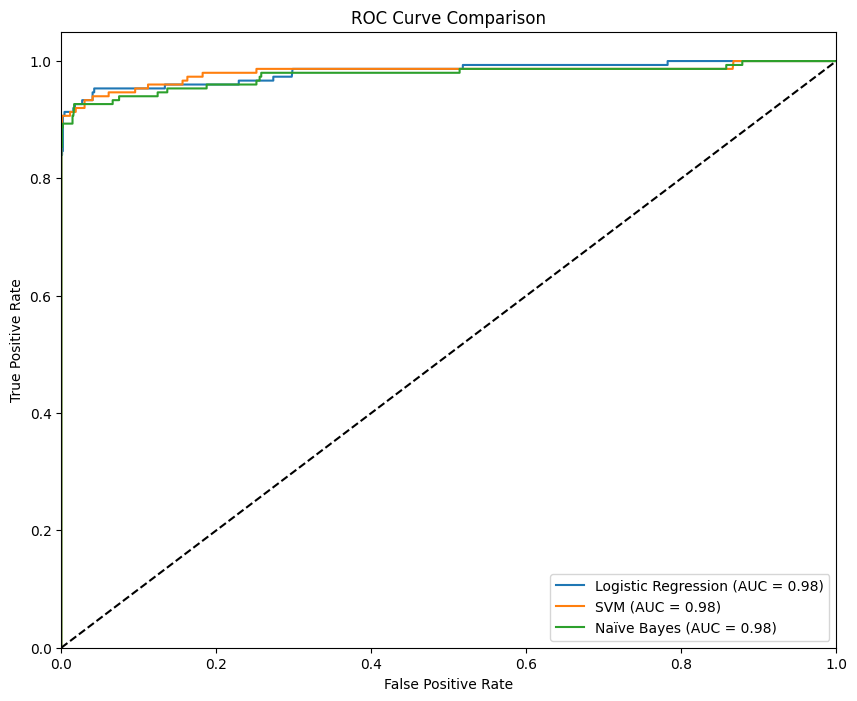

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcul des taux de vrais positifs et faux positifs pour chaque modèle
fpr_lr, tpr_lr, _ = roc_curve(pd.get_dummies(y_test, drop_first=True), lr_model.predict_proba(X_test_vectors)[:, 1])
fpr_svm, tpr_svm, _ = roc_curve(pd.get_dummies(y_test, drop_first=True), svm_model.predict_proba(X_test_vectors)[:, 1])
fpr_nb, tpr_nb, _ = roc_curve(pd.get_dummies(y_test, drop_first=True), nb_model.predict_proba(X_test_vectors)[:, 1])

# Calcul des AUC
auc_lr = auc(fpr_lr, tpr_lr)
auc_svm = auc(fpr_svm, tpr_svm)
auc_nb = auc(fpr_nb, tpr_nb)

# Tracé de la courbe ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naïve Bayes (AUC = {auc_nb:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()